In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

def snr(data, z, k_s, k_e):
    """
    Calculate Signal-to-Noise Ratio (SNR) for features in specified range
    
    Parameters:
    data : ndarray of shape (n_samples, n_features)
        Input data matrix
    z : ndarray of shape (n_samples,)
        Group labels array for sample grouping
    k_s : int
        Start index of features (inclusive)
    k_e : int
        End index of features (exclusive)
    
    Returns:
    list_snr : list
        SNR values for features [k_s, k_e-1]
    """
    unique_values, indices = np.unique(z, return_inverse=True)
    dict_address = {val: np.where(indices == idx)[0] for idx, val in enumerate(unique_values)}
    list_snr=[]
    for i in range(k_s,k_e):
        var_E=[]
        E_var=[]
        d = data[:, i]
        for k,v in dict_address.items():
            a=d[v]
            E_a=np.mean(a)
            var_a=np.var(a)
            var_E.append(E_a)
            E_var.append(var_a)
        var_E=np.array(var_E)
        E_var=np.array(E_var)
        result=np.var(var_E)/np.mean(E_var)
        list_snr.append(result)
    return list_snr

In [11]:
AES_OriginalMDS_path='./DataSet/AES_OriginalMDS/'
label_OriginalMDS=np.load(AES_OriginalMDS_path+'label_V.npy')[:,0]
traces_OriginalMDS=np.load(AES_OriginalMDS_path+'traces.npy')

AES_INVMDS_path='./DataSet/AES_INVMDS/'
label_INVMDS=np.load(AES_INVMDS_path+'label_V.npy')[:,0]
traces_INVMDS=np.load(AES_INVMDS_path+'traces.npy')


AES_RandomMDS_path='./DataSet/AES_RandomMDS/'
label_RandomMDS=np.load(AES_RandomMDS_path+'label_V.npy')[:,0]
traces_RandomMDS=np.load(AES_RandomMDS_path+'traces.npy')

list_snr_OriginalMDS=snr(traces_OriginalMDS, label_OriginalMDS, 0, 700)
list_snr_INVMDS=snr(traces_INVMDS, label_INVMDS, 0, 700)
list_snr_RandomMDS=snr(traces_RandomMDS, label_RandomMDS, 0, 700)


C:\Users\lidi\AppData\Local\Temp\ipykernel_12560\1928245386.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


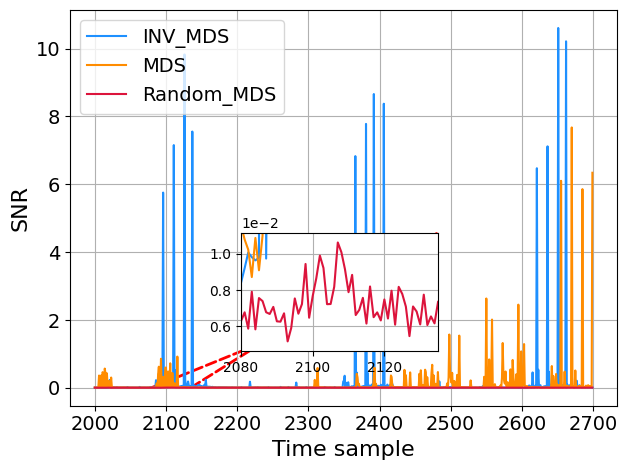

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

# Define x-axis range (data length remains 700, x-axis starts from 2000)
s = 2000
e = 2700  # Display from 2000 to 2700 (actual data: 2000-2699, 700 points)
x = np.arange(s, e)

# Create main plot
fig, ax = plt.subplots()
ax.plot(x, list_snr_INVMDS, label='INV_MDS', color='dodgerblue')
ax.plot(x, list_snr_OriginalMDS,    label='MDS', color='darkorange')
ax.plot(x, list_snr_RandomMDS,    label='Random_MDS', color='crimson')

ax.set_ylabel('SNR', fontsize=16)
ax.set_xlabel('Time sample', fontsize=16)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14, loc="upper left")
ax.grid(True)

# Define zoom window x-range (relative positions based on new x-axis)
zoom_left = 80     # Corresponds to 2080 in x-axis (2000+80)
zoom_right = 136   # Corresponds to 2136 in labels, actual slice ends at 2135 (index 135)

# Create inset axes for zoom window
axins = inset_axes(ax, width="40%", height="30%", loc="lower left",
                   bbox_to_anchor=(0.30, 0.12, 0.9, 1), bbox_transform=ax.transAxes)

# Plot same data in zoom window
axins.plot(x, list_snr_INVMDS, color='dodgerblue')
axins.plot(x, list_snr_OriginalMDS,    color='darkorange')
axins.plot(x, list_snr_RandomMDS,    color='crimson')

# Set zoom window x-axis limits
axins.set_xlim(x[zoom_left], x[zoom_right - 1])  # 2080 to 2135
axins.grid(True)
axins.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Calculate y-axis limits for zoom window
data_zone = np.concatenate([list_snr_RandomMDS[zoom_left:zoom_right]])
if data_zone.size == 0:
    raise ValueError("Zoom window data is empty, check zoom_left & zoom_right values.")
ymin = np.min(data_zone)
ymax = np.max(data_zone)
y_margin = 0.1 * (ymax - ymin)
axins.set_ylim(ymin - y_margin, ymax + y_margin)

# Create connector lines (coordinates auto-adapted to new x-axis)
x_main = x[zoom_left]  # Main plot connection point x=2080
y_main = list_snr_INVMDS[zoom_left]  # y-value remains same (data index still 80)

# Get inset plot boundaries
x_ins_left, x_ins_right = axins.get_xlim()
y_ins_top, y_ins_bottom = axins.get_ylim()

# Draw dashed connectors between main plot and zoom window
con1 = ConnectionPatch(
    xyA=(x_main, y_main), xyB=(x_ins_left, y_ins_top),
    coordsA='data', coordsB='data', axesA=ax, axesB=axins,
    color='red', linestyle='--', linewidth=2
)
con2 = ConnectionPatch(
    xyA=(x[zoom_right - 1], y_main),  # Main plot x=2135
    xyB=(x_ins_right, y_ins_bottom),
    coordsA='data', coordsB='data', axesA=ax, axesB=axins,
    color='red', linestyle='--', linewidth=2
)
ax.add_artist(con1)
ax.add_artist(con2)

plt.tight_layout()
plt.show()